In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
health_data = pd.read_csv('heart.csv')

In [27]:
print(health_data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'ID'],
      dtype='object')


In [28]:
print(health_data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target   ID  
0        0   0     1       1    0  
1        0   0 

In [29]:
print(health_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
ID          0
dtype: int64


In [30]:
import sqlite3 
import csv
con = sqlite3.connect("heart.db")
cur = con.cursor()

In [31]:
import sqlite3
import csv

conn = sqlite3.connect('heart_health.db')

cur = conn.cursor()

cur.execute('''DROP TABLE IF EXISTS HeartHealth''')
cur.execute('''CREATE TABLE IF NOT EXISTS HeartHealth (
                age INTEGER,
                sex INTEGER,
                cp INTEGER,
                trestbps INTEGER,
                chol INTEGER,
                fbs INTEGER,
                restecg INTEGER,
                thalach INTEGER,
                exang INTEGER,
                oldpeak REAL,
                slope INTEGER,
                ca INTEGER,
                thal INTEGER,
                target INTEGER,
                ID INTEGER,
                PRIMARY KEY (ID)
               )''')


with open('heart.csv', 'r') as file:
    dr = csv.DictReader(file)
    to_db = [(int(i.get('age', 0)),
              int(i.get('sex', 0)),
              int(i.get('cp', 0)),
              int(i.get('trestbps', 0)),
              int(i.get('chol', 0)),
              int(i.get('fbs', 0)),
              int(i.get('restecg', 0)),
              int(i.get('thalach', 0)),
              int(i.get('exang', 0)),
              float(i.get('oldpeak', 0.0)), 
              int(i.get('slope', 0)),
              int(i.get('ca', 0)),
              int(i.get('thal', 0)),
              int(i.get('target', 0)),
              int(i.get('ID', 0))) for i in dr]

cur.executemany('''INSERT INTO HeartHealth (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target, ID) 
                   VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''', to_db)

conn.commit()

def execute_and_print(query, description):
    print(f"\n{description}:")
    cur.execute(query)
    rows = cur.fetchall()
    if rows:
        for row in rows:
            print(row)
    else:
        print(0)

execute_and_print("SELECT * FROM HeartHealth LIMIT 10", "Sample Data")

execute_and_print("SELECT * FROM HeartHealth WHERE target != 0", "High Risk")




Sample Data:
(0, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1, 1, 0)
(0, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2, 1, 1)
(0, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2, 1, 2)
(0, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2, 1, 3)
(0, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2, 1, 4)
(0, 1, 0, 140, 192, 0, 1, 148, 0, 0.4, 1, 0, 1, 1, 5)
(0, 0, 1, 140, 294, 0, 0, 153, 0, 1.3, 1, 0, 2, 1, 6)
(0, 1, 1, 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3, 1, 7)
(0, 1, 2, 172, 199, 1, 1, 162, 0, 0.5, 2, 0, 3, 1, 8)
(0, 1, 2, 150, 168, 0, 1, 174, 0, 1.6, 2, 0, 2, 1, 9)

High Risk:
(0, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1, 1, 0)
(0, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2, 1, 1)
(0, 0, 1, 130, 204, 0, 0, 172, 0, 1.4, 2, 0, 2, 1, 2)
(0, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2, 1, 3)
(0, 0, 0, 120, 354, 0, 1, 163, 1, 0.6, 2, 0, 2, 1, 4)
(0, 1, 0, 140, 192, 0, 1, 148, 0, 0.4, 1, 0, 1, 1, 5)
(0, 0, 1, 140, 294, 0, 0, 153, 0, 1.3, 1, 0, 2, 1, 6)
(0, 1, 1, 120, 263, 0, 1, 173, 0, 0.0, 2, 0, 3, 1, 7)
(0

In [32]:
execute_and_print("SELECT cp, target, COUNT(*) as count from HeartHealth GROUP BY cp,target ORDER BY cp,target",'Chess Pain')


Chess Pain:
(0, 0, 104)
(0, 1, 39)
(1, 0, 9)
(1, 1, 41)
(2, 0, 18)
(2, 1, 69)
(3, 0, 7)
(3, 1, 16)


In [33]:
execute_and_print('SELECT target, AVG(trestbps) as avg_blood_pressure FROM HeartHealth GROUP BY target','Check if High Blood Pressure (trestbps) is Correlated with Heart Disease')


Check if High Blood Pressure (trestbps) is Correlated with Heart Disease:
(0, 134.3985507246377)
(1, 129.3030303030303)


In [34]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
 14  ID        303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [35]:
health_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ID
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,151.000000
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,87.612784
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,75.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,151.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,226.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,302.000000


In [36]:
target = health_data.groupby('target').size()
target

target
0    138
1    165
dtype: int64

In [37]:
def Heart_Disease(row):
    if row == 0:
        return 'Absence'
    else:
        return 'Presence'

In [39]:
health_data['Heart_Disease'] = health_data['target'].apply(Heart_Disease)
health_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ID,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,Presence
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,Presence
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2,Presence
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3,Presence
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4,Presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,298,Absence
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,299,Absence
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,300,Absence
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,301,Absence


In [41]:
target = health_data.groupby('Heart_Disease')['target'].count()
target

Heart_Disease
Absence     138
Presence    165
Name: target, dtype: int64

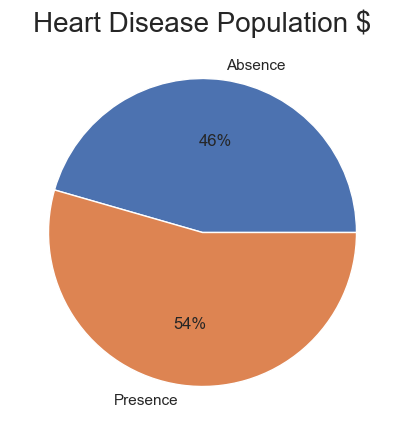

In [43]:
plt.figure(figsize = (6,5))
plt.pie(target, labels =['Absence','Presence'],autopct = '%0.0f%%')
plt.title('Heart Disease Population $',fontsize = 20)
plt.show()

Text(0, 0.5, 'Count')

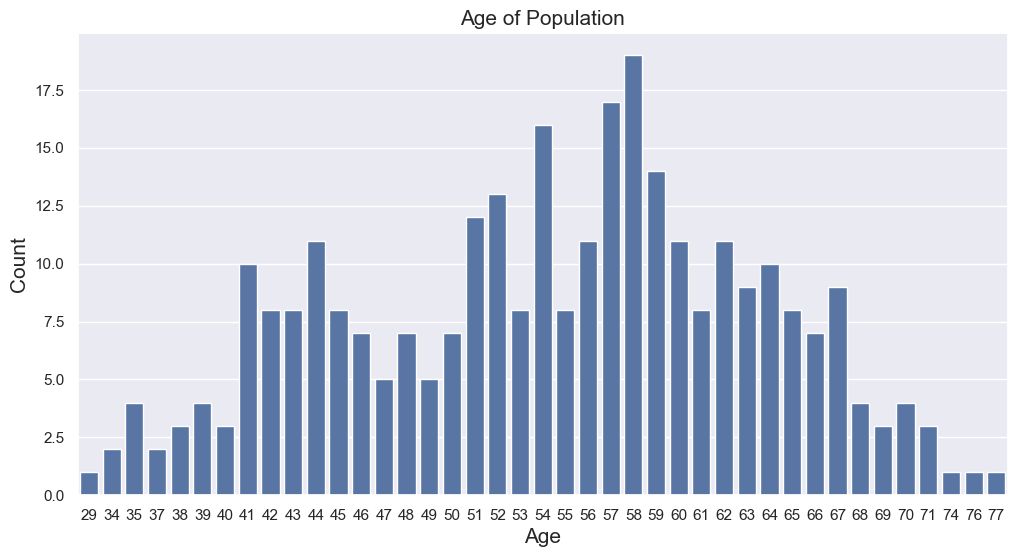

In [47]:
import seaborn as sns
sns.set()


plt.figure(figsize=(12, 6)) 
sns.countplot(x='age',data = health_data)
plt.title('Age of Population',fontsize = 15)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Count', fontsize = 15 )

In [49]:
Minimum_Age = health_data['age'].min()
Maximum_Age = health_data['age'].max()
Mean_Age = health_data['age'].mean()
print('Minimum Age in Population: ', Minimum_Age)
print('Maximum Age in Population: ', Maximum_Age)
print('Mean Age in Population: ', Mean_Age)



Minimum Age in Population:  29
Maximum Age in Population:  77
Mean Age in Population:  54.366336633663366


In [52]:

# number of age
Young_Ages = health_data[(health_data['age'] > Minimum_Age) & (health_data['age'] < 40)]
Mid_Ages = health_data[(health_data['age'] > 40) & (health_data['age'] < 55)]
Elder_Ages = health_data[(health_data['age'] >55)]
print("Young age:", len(Young_Ages))
print("Mid age:", len(Mid_Ages))
print("Elder age:", len(Elder_Ages))

Young age: 15
Mid age: 125
Old age: 151


C:\Users\Dell\AppData\Local\Temp\ipykernel_14880\2008610875.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ['Young_Ages','Mid_Ages','Elder_Ages'], y = [len(Young_Ages),len(Mid_Ages),len(Elder_Ages)],palette= 'YlGn_r')


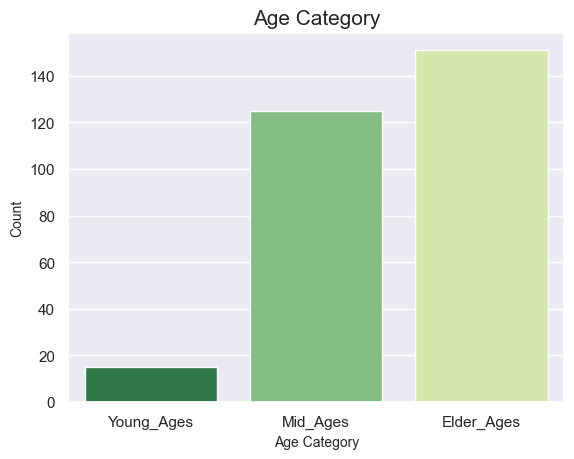

In [53]:
sns.barplot(x = ['Young_Ages','Mid_Ages','Elder_Ages'], y = [len(Young_Ages),len(Mid_Ages),len(Elder_Ages)],palette= 'YlGn_r')
plt.title('Age Category',fontsize = '15')
plt.xlabel('Age Category', fontsize = '10')
plt.ylabel('Count', fontsize= 10)
plt.show()

In [64]:
def Gender(row):
    if row == 1:
        return 'Male'
    else:
        return 'Female'

In [65]:
health_data['gender'] = health_data['sex'].apply(Gender)
health_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ID,Heart_Disease,gender,Age_Range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,Presence,Male,Elder Age
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,Presence,Male,Young Age
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2,Presence,Female,Mid Age
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,3,Presence,Male,Elder Age
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4,Presence,Female,Elder Age


In [66]:
def Age(row):
    if row >= 29 and row < 40:
        return 'Young Age'
    elif row >= 40 and row < 50:
        return 'Mid Age'
    else:
        return 'Elder Age'

In [67]:
health_data['Age_Range'] = health_data['age'].apply(Age)

In [68]:
health_data['Age_Range'].value_counts()

Age_Range
Elder Age    215
Mid Age       72
Young Age     16
Name: count, dtype: int64

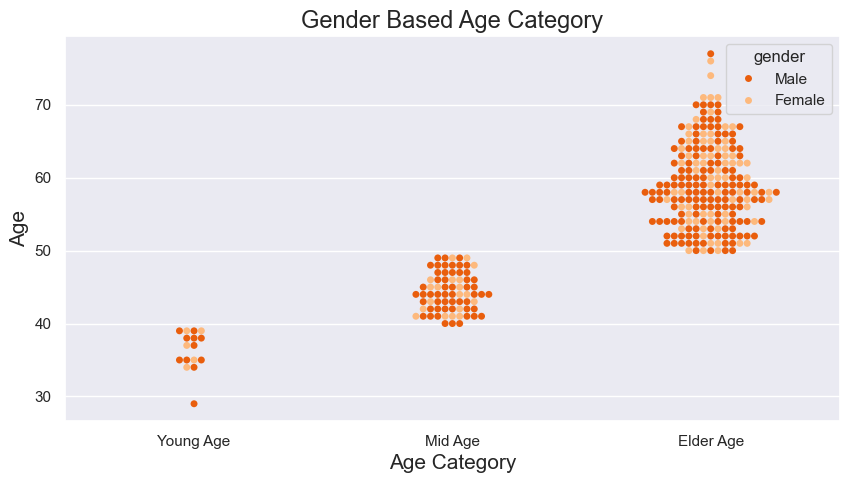

In [69]:
plt.figure(figsize = (10,5))
sns.swarmplot(x = 'Age_Range', y = 'age',hue = 'gender',data = health_data,order = ['Young Age', 'Mid Age','Elder Age'] , palette = 'Oranges_r')
plt.title('Gender Based Age Category', fontsize = 17)
plt.xlabel('Age Category', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.show()

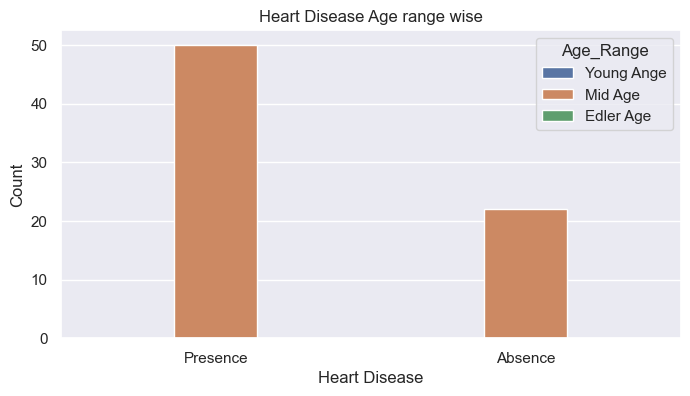

In [88]:
plt.figure(figsize = (8,4))
hue_o = ['Young Ange', 'Mid Age', 'Edler Age']
sns.countplot(x= 'Heart_Disease', hue = 'Age_Range', data = health_data, order = ['Presence', 'Absence'], hue_order = hue_o)
plt.title('Heart Disease Age range wise') 
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

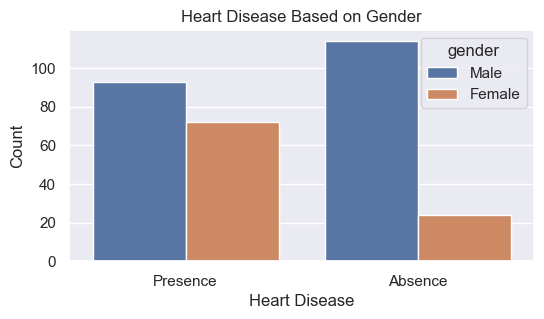

In [75]:
plt.figure(figsize = (6,3))
sns.countplot(x = 'Heart_Disease', hue = 'gender', data = health_data, order = ['Presence', 'Absence'])
plt.title('Heart Disease Based on Gender')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

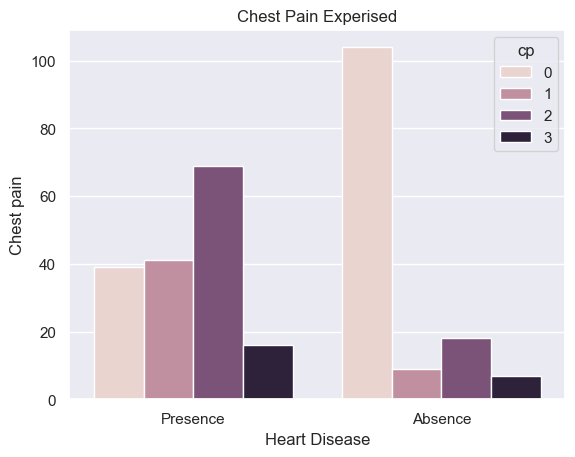

In [77]:
sns.countplot(x = 'Heart_Disease', hue = 'cp', data = health_data, order = ['Presence','Absence'])
plt.title('Chest Pain Experised')
plt.xlabel('Heart Disease')
plt.ylabel('Chest pain')
plt.show()

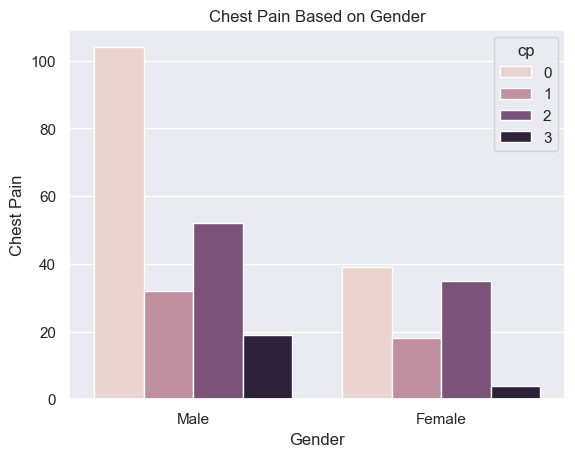

In [83]:
sns.countplot(x = 'gender', hue = 'cp', data = health_data, order = ['Male','Female'])
plt.title('Chest Pain Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Chest Pain')
plt.show()

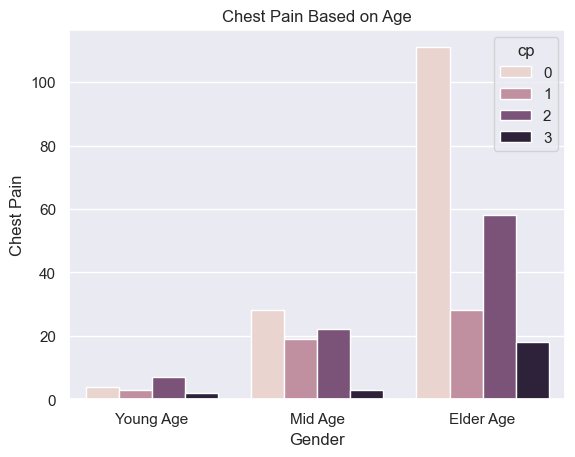

In [86]:
sns.countplot(x = 'Age_Range', hue = 'cp', data = health_data, order = ['Young Age','Mid Age','Elder Age'])
plt.title('Chest Pain Based on Age')
plt.xlabel('Gender')
plt.ylabel('Chest Pain')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14880\2931360075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'gender', y = 'trestbps', data = health_data, palette = 'ocean_r')


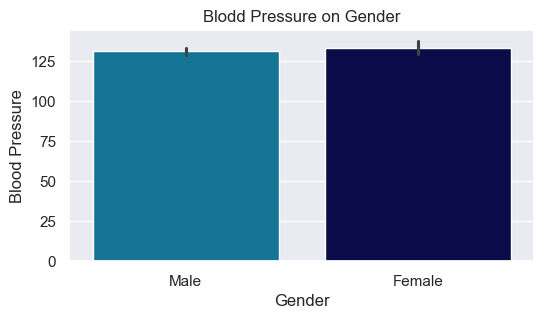

In [91]:
plt.figure(figsize = (6,3))
sns.barplot(x = 'gender', y = 'trestbps', data = health_data, palette = 'ocean_r')
plt.title('Blodd Pressure on Gender')
plt.xlabel('Gender')
plt.ylabel('Blood Pressure')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_14880\683213998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'gender', y = 'chol', data = health_data, palette = 'ocean_r')


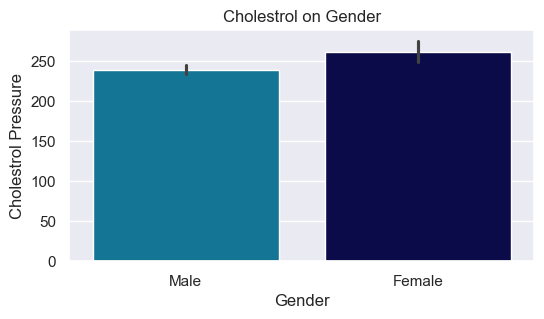

In [93]:
plt.figure(figsize = (6,3))
sns.barplot(x = 'gender', y = 'chol', data = health_data, palette = 'ocean_r')
plt.title('Cholestrol on Gender')
plt.xlabel('Gender')
plt.ylabel('Cholestrol Pressure')
plt.show()

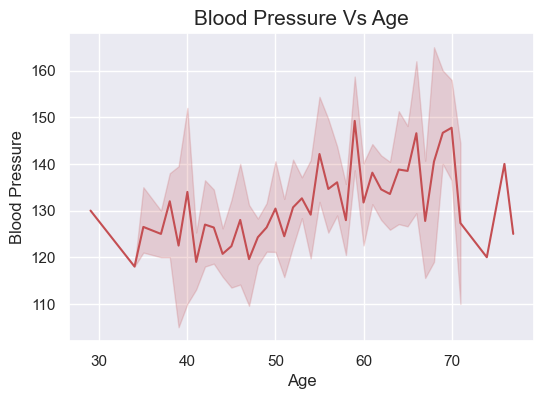

In [94]:
plt.figure(figsize = (6,4))
sns.lineplot(x = 'age', y = 'trestbps', data = health_data, color ='r')
plt.title('Blood Pressure Vs Age', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

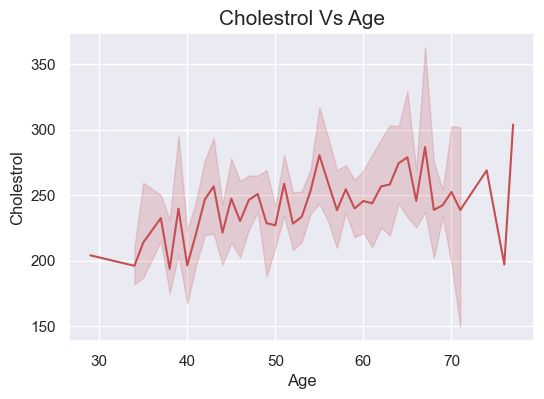

In [96]:
plt.figure(figsize = (6,4))
sns.lineplot(x = 'age', y = 'chol', data = health_data, color ='r')
plt.title('Cholestrol Vs Age', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.show()

50 to 60 also

Mean Squared Error: 2555.307868212297
R² Score: 0.04565826911946991


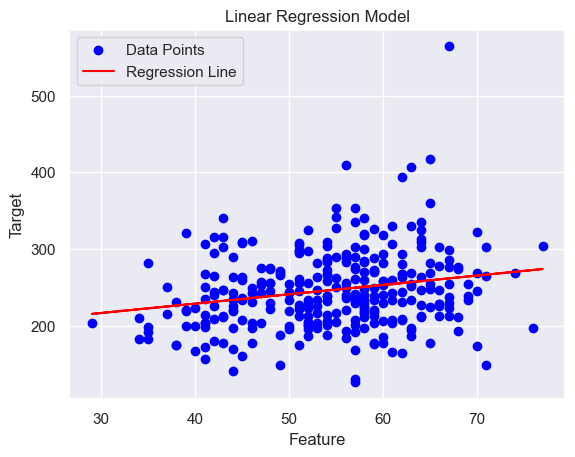

In [97]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = health_data[['age']].values  
y = health_data['chol'].values      

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
plt.scatter(X, y, color='blue', label='Data Points') 
plt.plot(X, y_pred, color='red', label='Regression Line') 
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Model')
plt.legend()
plt.show()